## Week 6 Day 4 Task 2 - Additional Datasets

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [23]:
#%pip install openpyxl


Project Structure

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [25]:
data_path = r"C:\Users\louis\Downloads\Data Technician Bootcamp\Week 6 - Python\Day 4\Day 4 Task 2"

datasets = {}

for file in os.listdir(data_path):
    if file.endswith(".xlsx"):
        name = file.replace(".xlsx", "")
        datasets[name] = pd.read_excel(os.path.join(data_path, file))

In [26]:
datasets.keys()

dict_keys(['AIRBNB', 'Apprenticeship_Data', 'Book_Sales', 'Data_Science_Jobs', 'Happiness', 'London_AIRBNB', 'NHS_Jobs'])

## Structural Overview

In [27]:
# --------------------------------------------
# Title: Overview of All Available Datasets
# Explanation:
# Iterates through each dataset loaded from the
# Task 2 folder and prints basic structural
# information including shape, column names,
# and missing value counts.
# --------------------------------------------

for name, df_ in datasets.items():
    print(f"\n===== {name} =====")
    print("Shape:", df_.shape)
    print("Columns:", df_.columns.tolist())
    print("Missing values per column:")
    print(df_.isna().sum())


===== AIRBNB =====
Shape: (48895, 16)
Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Missing values per column:
id                                    0
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

===== Apprentice

## ---------Dataset Level Analysis (Structural Overview Part 2)---------------

Data Set Summary Table

In [28]:
# --------------------------------------------
# Title: Dataset-Level Structural Summary
# Explanation:
# Creates a summary table describing each dataset
# by number of rows, columns, file size, and
# inferred study type to support dataset selection.
# --------------------------------------------

import os

dataset_summary = []

for name, df_ in datasets.items():
    file_path = os.path.join(data_path, f"{name}.xlsx")
    file_size_kb = os.path.getsize(file_path) / 1024

    # Infer study type (simple, human-readable categories)
    if "AIRBNB" in name:
        study_type = "Housing / Tourism"
    elif "Jobs" in name:
        study_type = "Job Market"
    elif "Apprenticeship" in name:
        study_type = "Education / Training"
    elif "Book" in name:
        study_type = "Retail / Sales"
    elif "Happiness" in name:
        study_type = "Social / Wellbeing"
    else:
        study_type = "Other"

    dataset_summary.append({
        "Dataset": name,
        "Rows": df_.shape[0],
        "Columns": df_.shape[1],
        "File Size (KB)": round(file_size_kb, 1),
        "Study Type": study_type
    })

summary_df = pd.DataFrame(dataset_summary)
summary_df

,Dataset,Rows,Columns,File Size (KB),Study Type
0,AIRBNB,48895,16,5899.7,Housing / Tourism
1,Apprenticeship_Data,8572,18,647.6,Education / Training
2,Book_Sales,550,7,48.6,Retail / Sales
3,Data_Science_Jobs,355,6,34.5,Job Market
4,Happiness,156,9,92.6,Social / Wellbeing
5,London_AIRBNB,69351,18,8597.4,Housing / Tourism
6,NHS_Jobs,27482,29,29225.5,Job Market


Datasets ranked by Information Density

In [29]:
# --------------------------------------------
# Title: Dataset Information Density
# Explanation:
# Calculates a simple information density metric
# using rows × columns to estimate analytical
# richness of each dataset.
# --------------------------------------------

summary_df["Info Density"] = summary_df["Rows"] * summary_df["Columns"]

summary_df.sort_values("Info Density", ascending=False)

,Dataset,Rows,Columns,File Size (KB),Study Type,Info Density
5,London_AIRBNB,69351,18,8597.4,Housing / Tourism,1248318
6,NHS_Jobs,27482,29,29225.5,Job Market,796978
0,AIRBNB,48895,16,5899.7,Housing / Tourism,782320
1,Apprenticeship_Data,8572,18,647.6,Education / Training,154296
2,Book_Sales,550,7,48.6,Retail / Sales,3850
3,Data_Science_Jobs,355,6,34.5,Job Market,2130
4,Happiness,156,9,92.6,Social / Wellbeing,1404


Visual Comparison of Dataset Sizes

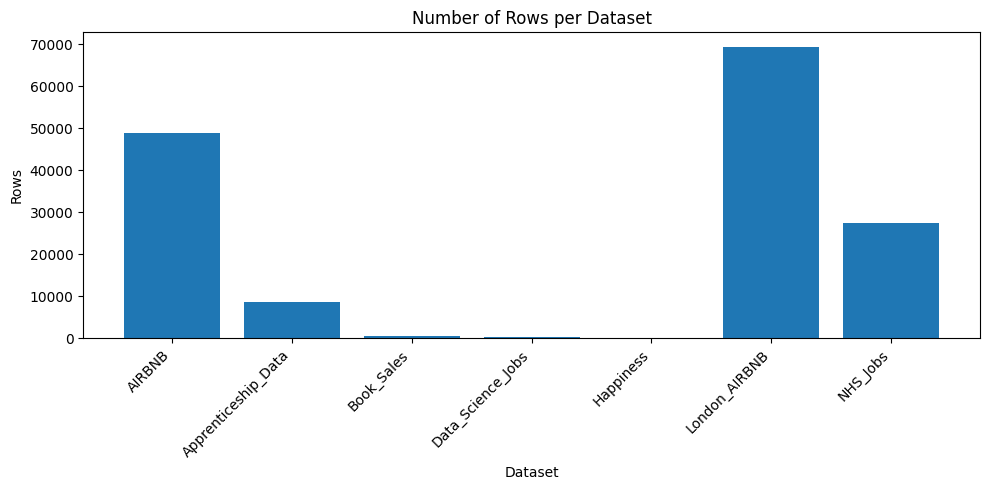

In [30]:
# --------------------------------------------
# Title: Number of Rows per Dataset
# Explanation:
# Visualises dataset sizes by number of rows
# to compare the volume of available data.
# --------------------------------------------

plt.figure(figsize=(10, 5))
plt.bar(summary_df["Dataset"], summary_df["Rows"])
plt.title("Number of Rows per Dataset")
plt.xlabel("Dataset")
plt.ylabel("Rows")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

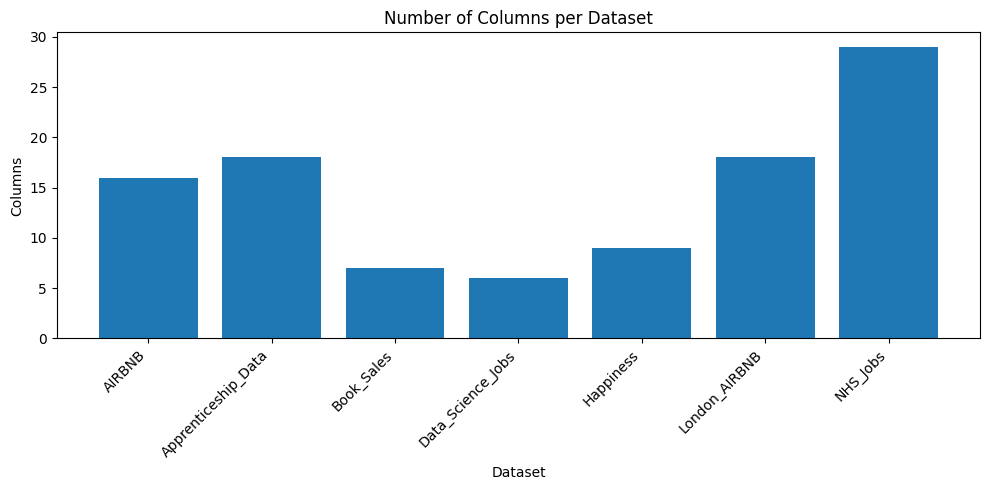

In [31]:
# --------------------------------------------
# Title: Number of Columns per Dataset
# Explanation:
# Compares datasets based on number of features
# available for analysis.
# --------------------------------------------

plt.figure(figsize=(10, 5))
plt.bar(summary_df["Dataset"], summary_df["Columns"])
plt.title("Number of Columns per Dataset")
plt.xlabel("Dataset")
plt.ylabel("Columns")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

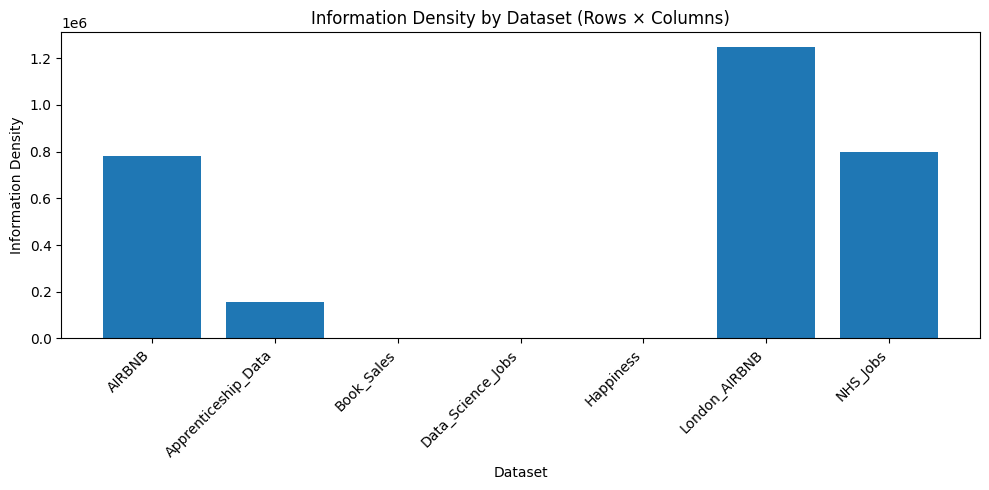

In [32]:
# --------------------------------------------
# Title: Information Density by Dataset
# Explanation:
# Shows a combined measure of dataset richness
# based on the product of rows and columns.
# --------------------------------------------

plt.figure(figsize=(10, 5))
plt.bar(summary_df["Dataset"], summary_df["Info Density"])
plt.title("Information Density by Dataset (Rows × Columns)")
plt.xlabel("Dataset")
plt.ylabel("Information Density")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [33]:
# --------------------------------------------
# Title: Dataset Selected for Deep-Dive Analysis
# Explanation:
# Selects the dataset with the highest
# information density for further exploration.
# --------------------------------------------

juiciest_dataset = summary_df.sort_values(
    "Info Density", ascending=False
).iloc[0]

juiciest_dataset

Dataset               London_AIRBNB
Rows                          69351
Columns                          18
File Size (KB)               8597.4
Study Type        Housing / Tourism
Info Density                1248318
Name: 5, dtype: object

In [34]:
df_focus = datasets[juiciest_dataset["Dataset"]]

# Analysis: London_AIRBNB Dataset

In [35]:
# --------------------------------------------
# Title: Dataset Selection for Deep-Dive Analysis
# Explanation:
# Selects the London_AIRBNB dataset for detailed
# exploratory data analysis based on its high
# information density and real-world relevance.
# --------------------------------------------

df_airbnb = datasets["London_AIRBNB"]
df_airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


In [36]:
# --------------------------------------------
# Title: Structure of London_AIRBNB Dataset
# Explanation:
# Displays data types, non-null counts, and
# memory usage to understand the structure
# and completeness of the dataset.
# --------------------------------------------

df_airbnb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69351 non-null  int64         
 1   name                            69326 non-null  object        
 2   host_id                         69351 non-null  int64         
 3   host_name                       69346 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   69351 non-null  object        
 6   latitude                        69351 non-null  float64       
 7   longitude                       69351 non-null  float64       
 8   room_type                       69351 non-null  object        
 9   price                           69351 non-null  int64         
 10  minimum_nights                  69351 non-null  int64         
 11  nu

In [37]:
# --------------------------------------------
# Title: Summary Statistics for London_AIRBNB
# Explanation:
# Provides descriptive statistics for numerical
# columns to understand distributions, ranges,
# and potential outliers.
# --------------------------------------------

df_airbnb.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,6.935100e+04,0.0,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000,52571,52571.000000,69351.000000,69351.000000,69351.000000,0.0
mean,1.373703e+17,1.242124e+08,NaN,51.509544,-0.128489,177.208822,5.997505,17.537051,2021-02-03 00:46:30.648836608,0.882593,11.987498,108.520266,4.734438,NaN
min,1.391300e+04,4.775000e+03,NaN,51.272480,-0.523600,0.000000,1.000000,0.000000,2011-07-02 00:00:00,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,1.870718e+07,NaN,51.483140,-0.189520,55.000000,1.000000,1.000000,2019-09-16 00:00:00,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,6.010350e+07,NaN,51.513600,-0.126200,100.000000,2.000000,4.000000,2022-06-07 00:00:00,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,1.960405e+08,NaN,51.539710,-0.068550,180.000000,4.000000,16.000000,2022-08-20 00:00:00,1.080000,4.000000,228.000000,5.000000,NaN
max,7.123951e+17,4.788540e+08,NaN,51.708930,0.305150,25000.000000,1125.000000,1141.000000,2022-09-11 00:00:00,51.330000,285.000000,365.000000,660.000000,NaN
std,2.651479e+17,1.377104e+08,NaN,0.049182,0.100957,412.823024,25.709514,40.410763,NaN,1.274510,37.148839,132.821088,12.032502,NaN


In [46]:
# --------------------------------------------
# Title: Price Quantiles for Airbnb Listings
# Explanation:
# Calculates key price quantiles to understand
# where the majority of listing prices lie.
# --------------------------------------------

df_airbnb["price"].quantile([0.5, 0.75, 0.9, 0.95, 0.99])


0.50     100.0
0.75     180.0
0.90     318.0
0.95     499.0
0.99    1570.0
Name: price, dtype: float64

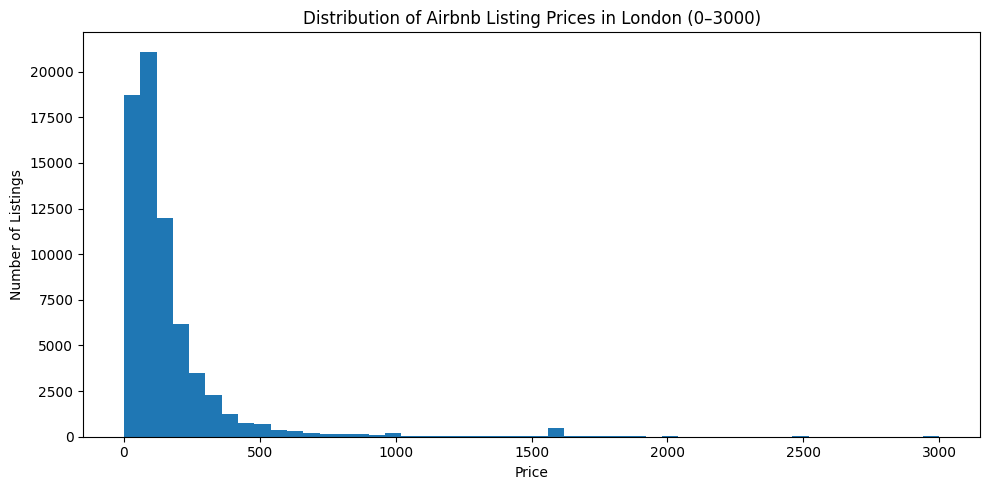

In [47]:
# --------------------------------------------
# Title: Distribution of Airbnb Listing Prices (Focused View)
# Explanation:
# Visualises Airbnb listing prices in London,
# focusing on the core market range (0–3000)
# to improve interpretability and highlight
# the most common pricing behaviour.
# --------------------------------------------

plt.figure(figsize=(10, 5))

plt.hist(
    df_airbnb.loc[df_airbnb["price"] <= 3000, "price"].dropna(),
    bins=50
)

plt.title("Distribution of Airbnb Listing Prices in London (0–3000)")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


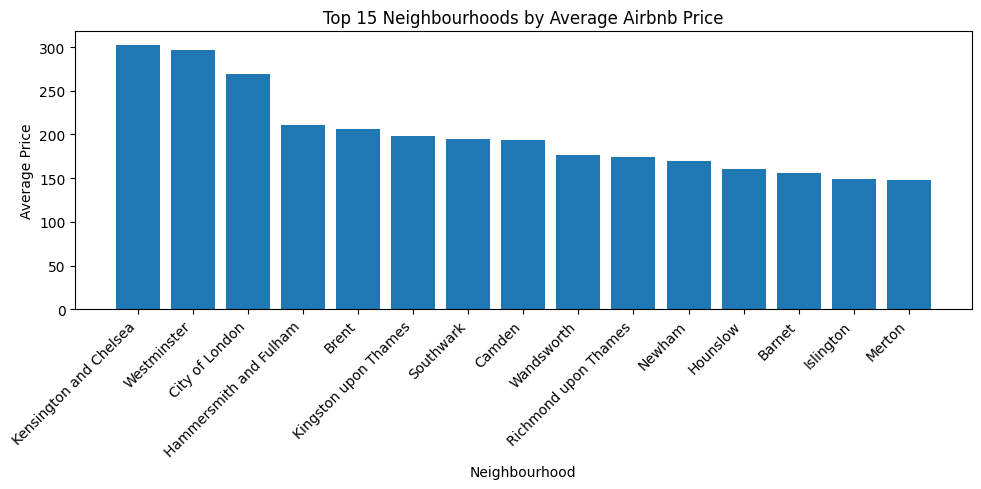

In [39]:
# --------------------------------------------
# Title: Average Airbnb Price by Neighbourhood
# Explanation:
# Calculates and visualises the average listing
# price per neighbourhood to identify spatial
# price differences across London.
# --------------------------------------------

avg_price_neighbourhood = (
    df_airbnb.groupby("neighbourhood")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 5))
plt.bar(avg_price_neighbourhood.index, avg_price_neighbourhood.values)
plt.title("Top 15 Neighbourhoods by Average Airbnb Price")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


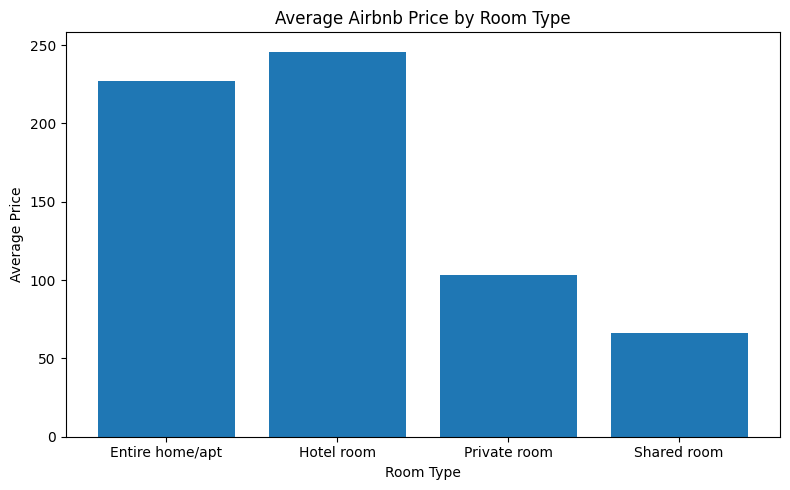

In [40]:
# --------------------------------------------
# Title: Average Price by Room Type
# Explanation:
# Compares average Airbnb prices across
# different room types to understand how
# accommodation type affects pricing.
# --------------------------------------------

avg_price_room = df_airbnb.groupby("room_type")["price"].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_price_room.index, avg_price_room.values)
plt.title("Average Airbnb Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


C:\Users\louis\AppData\Local\Temp\ipykernel_12672\4096596367.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(price_by_neighbourhood, labels=top_neighbourhoods, showfliers=True)


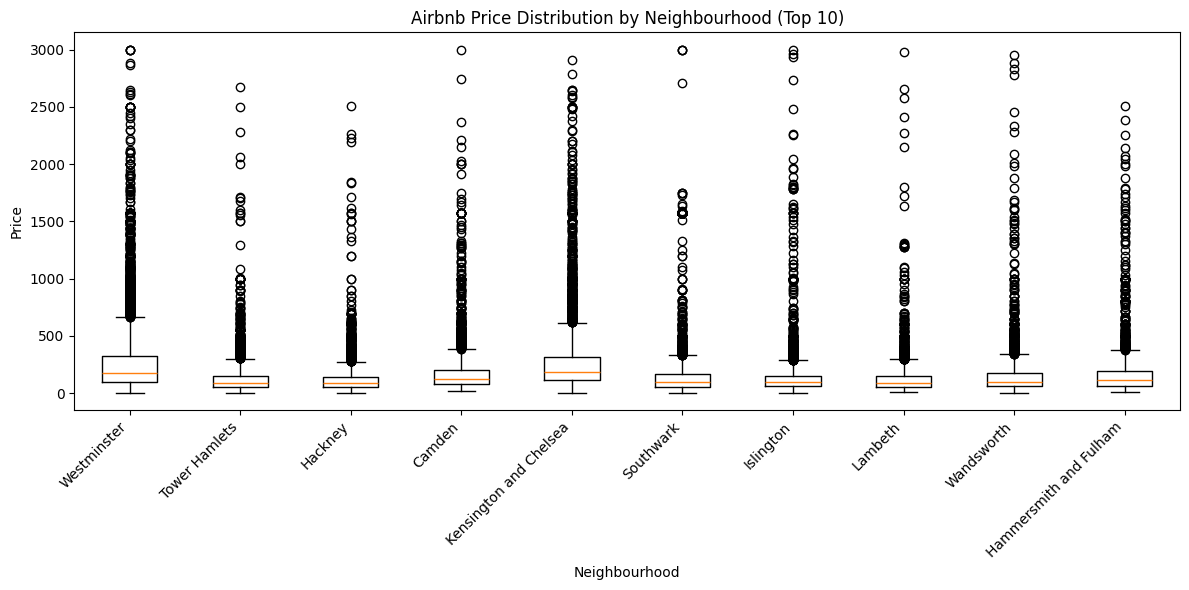

In [ ]:
# --------------------------------------------
# Title: Airbnb Prices by Neighbourhood (Top 10 by Listings)
# Explanation:
# Compares the distribution of Airbnb prices
# across the 10 neighbourhoods with the most
# listings, highlighting variation and outliers.
# --------------------------------------------
top_neighbourhoods = (
    df_airbnb["neighbourhood"]
    .value_counts()
    .head(10)
    .index
)
price_by_neighbourhood = [
    df_airbnb.loc[
        (df_airbnb["neighbourhood"] == n) & (df_airbnb["price"] <= 3000),
        "price"
    ].dropna()
    for n in top_neighbourhoods
]
plt.figure(figsize=(12, 6))
plt.boxplot(price_by_neighbourhood, labels=top_neighbourhoods, showfliers=True)
plt.title("Airbnb Price Distribution by Neighbourhood (Top 10)")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

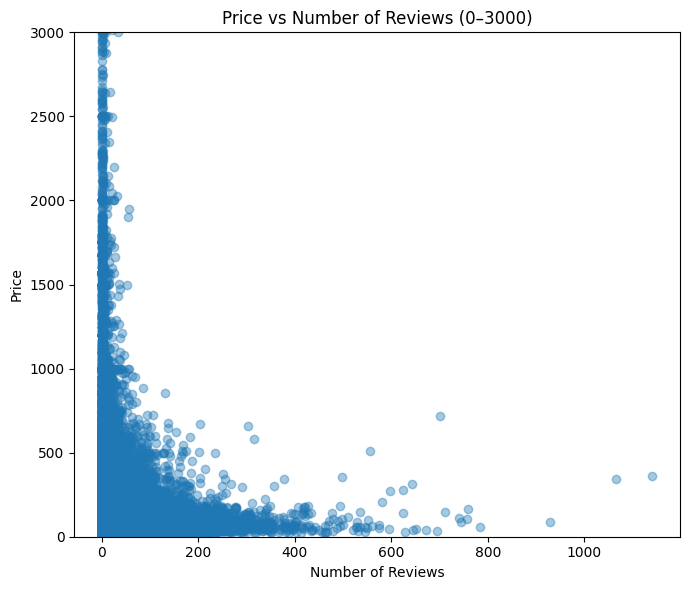

In [49]:
# --------------------------------------------
# Title: Price vs Number of Reviews
# Explanation:
# Examines the relationship between listing
# price and number of reviews to explore whether
# popularity is associated with pricing.
# --------------------------------------------

plt.figure(figsize=(7, 6))
plt.scatter(
    df_airbnb["number_of_reviews"],
    df_airbnb["price"],
    alpha=0.4
)
plt.ylim(0, 3000)
plt.title("Price vs Number of Reviews (0–3000)")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


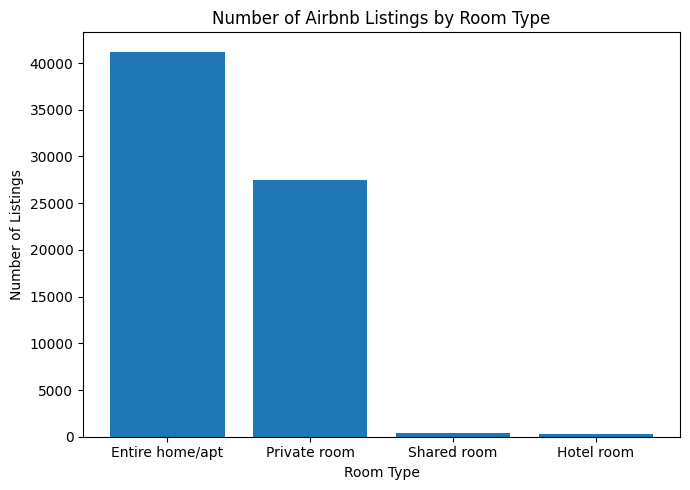

In [50]:
# --------------------------------------------
# Title: Number of Listings by Room Type
# Explanation:
# Displays the count of Airbnb listings by
# room type to understand the composition
# of the London Airbnb market.
# --------------------------------------------

room_counts = df_airbnb["room_type"].value_counts()

plt.figure(figsize=(7, 5))
plt.bar(room_counts.index, room_counts.values)
plt.title("Number of Airbnb Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


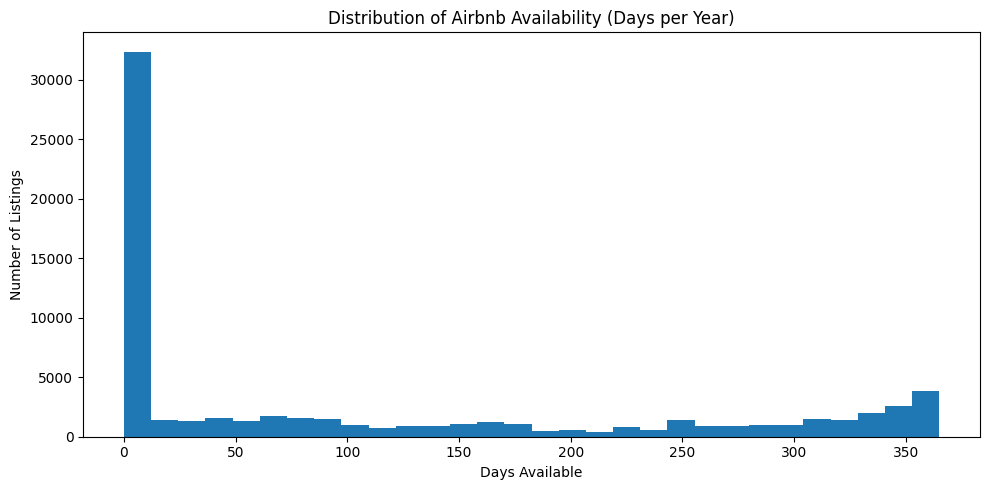

In [51]:
# --------------------------------------------
# Title: Distribution of Listing Availability (365 Days)
# Explanation:
# Visualises how many days per year listings
# are available, providing insight into hosting
# behaviour and demand.
# --------------------------------------------

plt.figure(figsize=(10, 5))
plt.hist(df_airbnb["availability_365"].dropna(), bins=30)
plt.title("Distribution of Airbnb Availability (Days per Year)")
plt.xlabel("Days Available")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


## Key Insights Analysis


LONDON AIRBNB — READER CONTEXT (WHAT NUMBERS MEAN)
- Price column detected: 'price'
- Neighbourhood column detected: 'neighbourhood'
- Room type column detected: 'room_type'

PRICE UNIT (WHAT THE '£' BUYS):
- Most Airbnb listing datasets store 'price' as the nightly listed price (cost for ONE NIGHT).
- In this script, we interpret 'price' as the LISTED UNIT PRICE for a stay period,
  and we label outputs as 'per-night' where that is the standard assumption.

WHAT PRICE TYPICALLY EXCLUDES (IMPORTANT):
- Cleaning fees, Airbnb service fees, taxes, deposits, discounts, and extra-guest fees
  are often stored in separate fields (or not present at all).
- So: '£X' here usually means the base listing price, NOT the final checkout total.

AVAILABILITY_365 (IF PRESENT):
- 'availability_365' usually means: number of days the listing is available
  to be booked in the next 365 days (0 = fully booked/unavailable, 365 = wide open).
  This is *not* the number of days it is occupied; it’s availabili

C:\Users\louis\AppData\Local\Temp\ipykernel_12672\3622365978.py:401: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_core.groupby(availability_bands)[price_col]


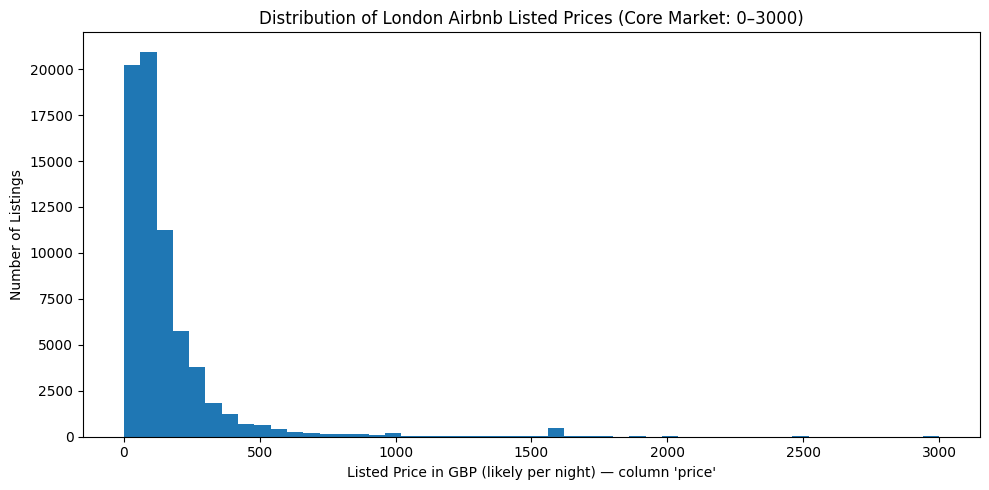

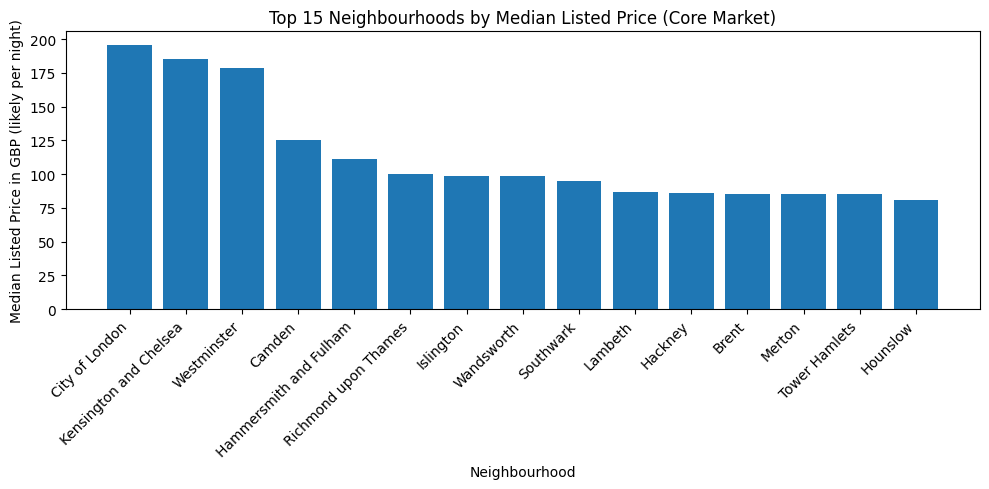

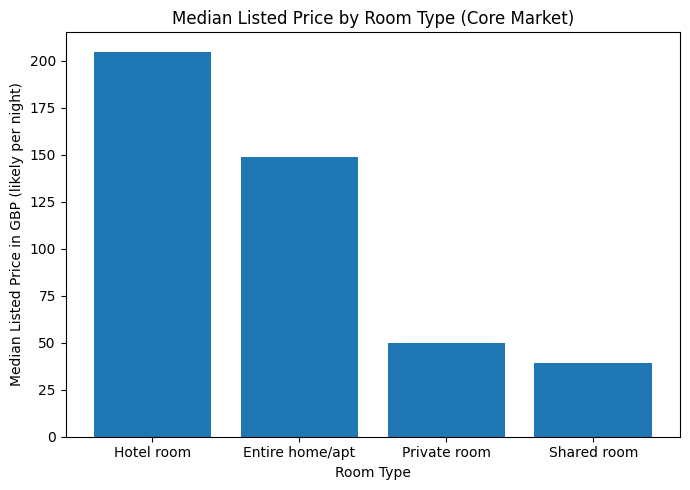

In [53]:
# ============================================================
# Title: London Airbnb — 10 Key Questions (Data-Driven Insights)
# Explanation:
# This script runs a structured EDA on the London_AIRBNB dataset
# and prints specific, numeric insights in readable sentences.
#
# IMPORTANT CONTEXT:
# Airbnb datasets almost always store "price" as the nightly listed price
# (i.e., cost for ONE NIGHT, per listing), but some datasets may differ.
# This script DOES NOT guess silently — it prints what it can infer and
# flags anything ambiguous.
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Title: Dataset Selection & Basic Setup
# Explanation:
# Loads the London_AIRBNB dataset from the preloaded 'datasets'
# dictionary and defines helper functions for consistent output.
# ------------------------------------------------------------

df = datasets["London_AIRBNB"].copy()

def fmt_currency(x):
    """Format numbers like £1,234 (no decimals)."""
    if pd.isna(x):
        return "N/A"
    return f"£{x:,.0f}"

def fmt_number(x):
    """Format numbers like 1,234."""
    if pd.isna(x):
        return "N/A"
    return f"{x:,.0f}"

def fmt_percent(x):
    """Format a proportion like 0.1234 as 12.34%."""
    if pd.isna(x):
        return "N/A"
    return f"{x*100:.2f}%"

def safe_col(df_, candidates):
    """
    Return the first column name found in df_ from a list of candidates.
    Useful if column naming differs slightly between files.
    """
    for c in candidates:
        if c in df_.columns:
            return c
    return None

# ------------------------------------------------------------
# Title: Column Detection (Robustness)
# Explanation:
# Detects common Airbnb column names. If your dataset uses
# different names, update the candidate lists below.
# ------------------------------------------------------------

price_col = safe_col(df, ["price", "Price", "price_gbp", "price_per_night"])
neigh_col = safe_col(df, ["neighbourhood", "neighborhood", "Neighbourhood"])
room_col  = safe_col(df, ["room_type", "Room Type", "roomtype"])
reviews_col = safe_col(df, ["number_of_reviews", "reviews", "review_count"])
availability_col = safe_col(df, ["availability_365", "availability", "Availability_365"])
min_nights_col = safe_col(df, ["minimum_nights", "min_nights", "minimum_night"])
host_listings_col = safe_col(df, ["calculated_host_listings_count", "host_listings_count"])
rating_col = safe_col(df, ["review_scores_rating", "rating", "review_rating"])
lat_col = safe_col(df, ["latitude", "lat"])
lon_col = safe_col(df, ["longitude", "lon"])

missing_required = [c for c in [price_col, neigh_col, room_col] if c is None]
if missing_required:
    raise ValueError(
        "Missing one or more required columns for this analysis. "
        f"Detected: price={price_col}, neighbourhood={neigh_col}, room_type={room_col}. "
        "Please check your dataset column names."
    )

# ------------------------------------------------------------
# Title: What does "price" mean? (Units + Fees Disclaimer)
# Explanation:
# Many Airbnb listing datasets (e.g., InsideAirbnb-style) store:
#   - price = nightly listed price (per night)
#   - excludes cleaning fee, service fee, taxes unless explicitly included
# HOWEVER: datasets vary. If there is no data dictionary, we cannot be 100%.
# This section prints a clear explanation so readers know what the £ values represent.
# ------------------------------------------------------------

# Try to infer from column naming (weak signal)
price_name_lower = str(price_col).lower()
likely_nightly = ("night" in price_name_lower) or ("per_night" in price_name_lower) or (price_name_lower == "price")

price_unit_statement = (
    "Most Airbnb listing datasets store 'price' as the nightly listed price (cost for ONE NIGHT)."
    if likely_nightly else
    "This dataset's price column name does not explicitly confirm a time unit (night/week/month)."
)

print("\n" + "="*72)
print("LONDON AIRBNB — READER CONTEXT (WHAT NUMBERS MEAN)")
print("="*72)
print(f"- Price column detected: '{price_col}'")
print(f"- Neighbourhood column detected: '{neigh_col}'")
print(f"- Room type column detected: '{room_col}'")
print()
print("PRICE UNIT (WHAT THE '£' BUYS):")
print(f"- {price_unit_statement}")
print("- In this script, we interpret 'price' as the LISTED UNIT PRICE for a stay period,")
print("  and we label outputs as 'per-night' where that is the standard assumption.")
print()
print("WHAT PRICE TYPICALLY EXCLUDES (IMPORTANT):")
print("- Cleaning fees, Airbnb service fees, taxes, deposits, discounts, and extra-guest fees")
print("  are often stored in separate fields (or not present at all).")
print("- So: '£X' here usually means the base listing price, NOT the final checkout total.")
print()
if availability_col is not None:
    print("AVAILABILITY_365 (IF PRESENT):")
    print("- 'availability_365' usually means: number of days the listing is available")
    print("  to be booked in the next 365 days (0 = fully booked/unavailable, 365 = wide open).")
    print("  This is *not* the number of days it is occupied; it’s availability, not bookings.")
print()
if reviews_col is not None:
    print("REVIEWS (IF PRESENT):")
    print("- 'number_of_reviews' is typically the total count of guest reviews for the listing.")
    print("  More reviews can indicate popularity, age of listing, or both.")
print()
if min_nights_col is not None:
    print("MINIMUM_NIGHTS (IF PRESENT):")
    print("- 'minimum_nights' is the minimum stay length required by the host.")
    print("  Even a low nightly price can imply a high minimum total cost if min nights is high.")
print("="*72 + "\n")

# ------------------------------------------------------------
# Title: Price Cleaning (Core Market Focus)
# Explanation:
# Ensures price is numeric and creates a 'core market' subset
# focused on typical prices (<= 3000) to reduce the effect of
# extreme outliers on insights and visuals.
#
# NOTE: All prices below are in GBP, and (most likely) PER NIGHT.
# ------------------------------------------------------------

df[price_col] = pd.to_numeric(df[price_col], errors="coerce")

df_priced = df[df[price_col].notna()].copy()
df_priced = df_priced[df_priced[price_col] > 0]   # remove free/invalid

df_core = df_priced[df_priced[price_col] <= 3000].copy()

# Helpful derived fields for reader clarity (only if "nightly" assumption holds)
# Even if unit isn't guaranteed, these are still useful "if price is nightly" interpretations.
df_core["est_week_cost_if_nightly"] = df_core[price_col] * 7
df_core["est_month_cost_if_nightly"] = df_core[price_col] * 30

if min_nights_col is not None:
    df_core[min_nights_col] = pd.to_numeric(df_core[min_nights_col], errors="coerce")
    df_core["est_min_stay_cost_if_nightly"] = df_core[price_col] * df_core[min_nights_col]

# ------------------------------------------------------------
# Title: 10 Key Questions (Printed at the Top)
# ------------------------------------------------------------

questions = [
    "1) What is the typical listing price in London (median / mean / 75th / 95th percentile)?",
    "2) How many listings are in the dataset, and how many are within the core market (<= £3000)?",
    "3) Which neighbourhoods are most expensive (by median), and how much more expensive is #1 vs #2?",
    "4) Which neighbourhoods have the most listings, and what is the typical (median) price in those areas?",
    "5) How does price differ by room type, and how much more expensive is 'Entire home/apt' than 'Private room'?",
    "6) What proportion of listings are each room type (market composition)?",
    "7) Are cheaper listings more popular? (Correlation between price and number of reviews)",
    "8) Do more available listings tend to be cheaper or more expensive? (Median price by availability bands)",
    "9) What are the most extreme prices in the data, and how rare are they (top 1%)?",
    "10) Which features have the most missing data (data quality hotspots)?",
]

print("\n" + "="*72)
print("LONDON AIRBNB — 10 KEY QUESTIONS")
print("="*72)
for q in questions:
    print(q)
print("="*72 + "\n")

# ============================================================
# ANSWERS (Specific, Numeric, Readable Print Outputs)
# ============================================================

# ------------------------------------------------------------
# Title: Q1 — Typical Price Range (Percentiles)
# Explanation:
# Uses distribution statistics to define what 'typical' means
# using median and upper percentiles.
#
# Interpretation:
# - These are (most likely) GBP PER NIGHT base prices.
# - We also print estimated week/month equivalents for intuition.
# ------------------------------------------------------------

q1 = df_core[price_col].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
p25, p50, p75, p90, p95, p99 = q1["25%"], q1["50%"], q1["75%"], q1["90%"], q1["95%"], q1["99%"]
mean_price = df_core[price_col].mean()

print("Q1) Typical listing price in London (core market <= £3000):")
print(f"    Median listed price is {fmt_currency(p50)} and mean listed price is {fmt_currency(mean_price)}.")
print("    (Interpreting price as nightly base price unless your dataset states otherwise.)")
print(f"    75% of listings are priced at or below {fmt_currency(p75)}.")
print(f"    95% of listings are priced at or below {fmt_currency(p95)} (top 5% above this).")
print(f"    99% of listings are priced at or below {fmt_currency(p99)}.")
print()
print("    Helpful intuition (IF price is per night):")
print(f"    - Median ≈ {fmt_currency(p50)} per night → ≈ {fmt_currency(p50*7)} per week, ≈ {fmt_currency(p50*30)} per 30-day month.\n")

# ------------------------------------------------------------
# Title: Q2 — Dataset Size vs Core Market Size
# ------------------------------------------------------------

total_listings = df_priced.shape[0]
core_listings = df_core.shape[0]
core_share = core_listings / total_listings if total_listings else np.nan

print("Q2) Listings count and core-market share:")
print(f"    Total listings with a valid positive price: {fmt_number(total_listings)}.")
print(f"    Listings in core market (<= £3000): {fmt_number(core_listings)} ({fmt_percent(core_share)} of priced listings).\n")

# ------------------------------------------------------------
# Title: Q3 — Most Expensive Neighbourhoods (Median)
# Explanation:
# Median is used because it's more robust to outliers than mean.
# 'Most expensive' here means highest median listed price.
# ------------------------------------------------------------

neigh_stats = (
    df_core.groupby(neigh_col)[price_col]
    .agg(count="count", median="median", mean="mean")
    .sort_values("median", ascending=False)
)

top_neigh = neigh_stats.head(5)

if len(top_neigh) >= 2:
    n1, n2 = top_neigh.index[0], top_neigh.index[1]
    n1_med, n2_med = top_neigh.loc[n1, "median"], top_neigh.loc[n2, "median"]
    diff = n1_med - n2_med
else:
    n1 = n2 = None
    n1_med = n2_med = diff = np.nan

print("Q3) Most expensive neighbourhoods (by median listed price, core market):")
print(top_neigh[["count", "median", "mean"]].rename(columns={"count":"Listings", "median":"Median (Listed Price)", "mean":"Mean (Listed Price)"}))
print()
print(f"    The most expensive neighbourhood by median listed price is '{n1}' at {fmt_currency(n1_med)} (likely per night).")
print(f"    The second is '{n2}' at {fmt_currency(n2_med)} (likely per night).")
print(f"    '{n1}' is {fmt_currency(diff)} more expensive than '{n2}' by median listed price.\n")

# ------------------------------------------------------------
# Title: Q4 — Neighbourhoods with Most Listings + Typical Price There
# Explanation:
# This answers: "Where is the dataset most concentrated?"
# High volume does NOT mean "best" — it means most represented.
# ------------------------------------------------------------

neigh_volume = df_core[neigh_col].value_counts().head(5)
neigh_volume_df = neigh_volume.to_frame(name="Listings")
neigh_volume_df["Median Listed Price"] = [
    df_core.loc[df_core[neigh_col] == n, price_col].median() for n in neigh_volume_df.index
]

print("Q4) Neighbourhoods with most listings (core market):")
tmp = neigh_volume_df.copy()
tmp["Median Listed Price"] = tmp["Median Listed Price"].map(fmt_currency)
print(tmp)
print()

most_listings_neigh = neigh_volume_df.index[0]
most_listings_count = neigh_volume_df.loc[most_listings_neigh, "Listings"]
most_listings_median = df_core.loc[df_core[neigh_col] == most_listings_neigh, price_col].median()

print(f"    '{most_listings_neigh}' has the most listings ({fmt_number(most_listings_count)}).")
print(f"    Typical listed price there is {fmt_currency(most_listings_median)} (median; likely per night).\n")

# ------------------------------------------------------------
# Title: Q5 — Room Type Price Differences (Median + Gap)
# Explanation:
# Room types usually mean:
# - Entire home/apt: whole place
# - Private room: private bedroom, shared common areas
# - Shared room: bed/room shared with others
# ------------------------------------------------------------

room_stats = (
    df_core.groupby(room_col)[price_col]
    .agg(count="count", median="median", mean="mean")
    .sort_values("median", ascending=False)
)

print("Q5) Price differences by room type (core market; listed prices):")
print(room_stats.rename(columns={"count":"Listings", "median":"Median (Listed Price)", "mean":"Mean (Listed Price)"}))
print()

entire_key = None
private_key = None

for rt in room_stats.index:
    rt_lower = str(rt).lower()
    if "entire" in rt_lower:
        entire_key = rt
    if "private" in rt_lower:
        private_key = rt

if entire_key is not None and private_key is not None:
    entire_med = room_stats.loc[entire_key, "median"]
    private_med = room_stats.loc[private_key, "median"]
    gap = entire_med - private_med
    pct_gap = gap / private_med if private_med else np.nan

    print(f"    Median listed price for '{entire_key}' is {fmt_currency(entire_med)} (likely per night).")
    print(f"    Median listed price for '{private_key}' is {fmt_currency(private_med)} (likely per night).")
    print(f"    '{entire_key}' is {fmt_currency(gap)} more expensive than '{private_key}' by median, "
          f"which is approximately {fmt_percent(pct_gap)} higher.")
    print("    (Remember: this is base listed price — fees/taxes may change checkout totals.)\n")
else:
    print("    Could not find both 'Entire' and 'Private' room types based on text matching.\n")

# ------------------------------------------------------------
# Title: Q6 — Room Type Market Share
# ------------------------------------------------------------

room_counts = df_core[room_col].value_counts(dropna=False)
room_share = (room_counts / room_counts.sum()).to_frame(name="Share of Listings")
room_share["Listings"] = room_counts
room_share = room_share[["Listings", "Share of Listings"]]

print("Q6) Room type market composition (core market):")
tmp = room_share.copy()
tmp["Share of Listings"] = tmp["Share of Listings"].map(fmt_percent)
print(tmp)
print()

top_room = room_counts.index[0]
top_room_share = room_counts.iloc[0] / room_counts.sum()
print(f"    The most common room type is '{top_room}', making up {fmt_percent(top_room_share)} of core-market listings.\n")

# ------------------------------------------------------------
# Title: Q7 — Price vs Popularity (Correlation with Reviews)
# Explanation:
# Correlation answers: "When price goes up, do reviews tend to go up or down?"
# BUT:
# - Reviews are affected by listing age, host activity, location, etc.
# - Correlation ≠ causation
# ------------------------------------------------------------

if reviews_col is not None:
    df_corr = df_core[[price_col, reviews_col]].dropna().copy()
    df_corr[reviews_col] = pd.to_numeric(df_corr[reviews_col], errors="coerce")
    df_corr = df_corr.dropna()

    if len(df_corr) >= 10:
        corr_val = df_corr[[price_col, reviews_col]].corr().iloc[0, 1]
        print("Q7) Are cheaper listings more popular?")
        print(f"    Correlation between listed price and number of reviews is {corr_val:.3f}.")
        print("    Interpretation guide:")
        print("    - Negative value: cheaper listings tend to have more reviews (weak/strong depending on magnitude).")
        print("    - Positive value: more expensive listings tend to have more reviews.")
        print("    - Near zero: little to no linear relationship.")
        if corr_val < -0.1:
            print("    Result suggests a negative relationship (cheaper listings tend to have more reviews).\n")
        elif corr_val > 0.1:
            print("    Result suggests a positive relationship (higher-priced listings tend to have more reviews).\n")
        else:
            print("    Result suggests little to no linear relationship.\n")
    else:
        print("Q7) Are cheaper listings more popular?")
        print("    Not enough non-missing data to compute a stable correlation.\n")
else:
    print("Q7) Are cheaper listings more popular?")
    print("    'number_of_reviews' column not found in this dataset.\n")

# ------------------------------------------------------------
# Title: Q8 — Availability Bands vs Median Price
# Explanation:
# availability_365 typically measures how many days are OPEN to book in the next year.
# Higher availability can mean:
# - new listing
# - low demand
# - host keeps calendar open
# - seasonal behavior
# Not a direct "occupancy rate".
# ------------------------------------------------------------

if availability_col is not None:
    df_core[availability_col] = pd.to_numeric(df_core[availability_col], errors="coerce")

    availability_bands = pd.cut(
        df_core[availability_col],
        bins=[-1, 30, 90, 180, 365],
        labels=["0–30 days available", "31–90 days available", "91–180 days available", "181–365 days available"]
    )

    avail_price = (
        df_core.groupby(availability_bands)[price_col]
        .median()
        .to_frame(name="Median Listed Price")
    )

    print("Q8) Median listed price by availability band:")
    tmp = avail_price.copy()
    tmp["Median Listed Price"] = tmp["Median Listed Price"].map(fmt_currency)
    print(tmp)
    print()

    highest_band = avail_price["Median Listed Price"].idxmax()
    lowest_band = avail_price["Median Listed Price"].idxmin()
    diff_band = avail_price.loc[highest_band, "Median Listed Price"] - avail_price.loc[lowest_band, "Median Listed Price"]

    print(f"    Highest median listed price band: '{highest_band}' at {fmt_currency(avail_price.loc[highest_band, 'Median Listed Price'])}.")
    print(f"    Lowest median listed price band: '{lowest_band}' at {fmt_currency(avail_price.loc[lowest_band, 'Median Listed Price'])}.")
    print(f"    Difference between bands: {fmt_currency(diff_band)} (median listed price; likely per night).\n")
else:
    print("Q8) Median price by availability band:")
    print("    'availability_365' column not found in this dataset.\n")

# ------------------------------------------------------------
# Title: Q9 — Extreme Prices and Rarity (Top 1%)
# Explanation:
# Uses the full priced dataset (not core) because we want to measure extremes.
# Prints:
# - 99th percentile threshold
# - max price
# - how many listings sit above the 99th percentile
# ------------------------------------------------------------

p99_full = df_priced[price_col].quantile(0.99)
max_price = df_priced[price_col].max()
count_above_p99 = (df_priced[price_col] > p99_full).sum()
share_above_p99 = count_above_p99 / len(df_priced) if len(df_priced) else np.nan

print("Q9) Extreme prices and rarity (full priced dataset):")
print(f"    99th percentile listed price is {fmt_currency(p99_full)}.")
print(f"    Maximum observed listed price is {fmt_currency(max_price)}.")
print(f"    Listings above the 99th percentile: {fmt_number(count_above_p99)} ({fmt_percent(share_above_p99)} of priced listings).")
print("    (These are often luxury stays, unusual listings, data-entry quirks, or special events.)\n")

# ------------------------------------------------------------
# Title: Extra: Minimum-stay cost (if minimum_nights exists)
# Explanation:
# Readers often care about: "What do I actually have to pay at minimum?"
# If price is nightly and minimum_nights exists, we can estimate:
#   minimum_total_cost ≈ nightly_price * minimum_nights
# This still excludes fees/taxes.
# ------------------------------------------------------------

if min_nights_col is not None and "est_min_stay_cost_if_nightly" in df_core.columns:
    valid_min = df_core[["est_min_stay_cost_if_nightly", min_nights_col]].dropna()
    if len(valid_min) >= 10:
        med_min_nights = valid_min[min_nights_col].median()
        med_min_total = valid_min["est_min_stay_cost_if_nightly"].median()
        p90_min_total = valid_min["est_min_stay_cost_if_nightly"].quantile(0.90)

        print("Extra Insight) Minimum-stay cost (IF price is per night):")
        print(f"    Median minimum nights is {fmt_number(med_min_nights)} nights.")
        print(f"    Median estimated minimum-stay cost is {fmt_currency(med_min_total)} (nightly price × minimum nights).")
        print(f"    90th percentile minimum-stay cost is {fmt_currency(p90_min_total)}.\n")

# ------------------------------------------------------------
# Title: Q10 — Missing Data Hotspots
# Explanation:
# Missingness matters because it affects which analyses you can trust.
# ------------------------------------------------------------

missing_counts = df.isna().sum()
missing_share = df.isna().mean().sort_values(ascending=False)

missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Share": missing_share
}).sort_values("Missing Share", ascending=False)

print("Q10) Columns with the most missing data:")
tmp = missing_summary.head(10).copy()
tmp["Missing Share"] = tmp["Missing Share"].map(fmt_percent)
print(tmp)
print("\n")

# ============================================================
# OPTIONAL VISUALS (Support the printed insights)
# ============================================================

# ------------------------------------------------------------
# Visual 1: Price Distribution (0–3000)
# Interpretation:
# - x-axis is listed price (likely per night), GBP
# - y-axis is number of listings
# ------------------------------------------------------------

plt.figure(figsize=(10, 5))
plt.hist(df_core[price_col].dropna(), bins=50)
plt.title("Distribution of London Airbnb Listed Prices (Core Market: 0–3000)")
plt.xlabel(f"Listed Price in GBP (likely per night) — column '{price_col}'")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Visual 2: Top 15 Neighbourhoods by Median Price
# Interpretation:
# - bar height = median listed price (likely per night)
# - only includes listings in core market
# ------------------------------------------------------------

top15_neigh = neigh_stats.head(15)["median"]

plt.figure(figsize=(10, 5))
plt.bar(top15_neigh.index, top15_neigh.values)
plt.title("Top 15 Neighbourhoods by Median Listed Price (Core Market)")
plt.xlabel("Neighbourhood")
plt.ylabel("Median Listed Price in GBP (likely per night)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Visual 3: Room Type Median Price
# Interpretation:
# - compares typical listed price across room types
# ------------------------------------------------------------

plt.figure(figsize=(7, 5))
plt.bar(room_stats.index, room_stats["median"].values)
plt.title("Median Listed Price by Room Type (Core Market)")
plt.xlabel("Room Type")
plt.ylabel("Median Listed Price in GBP (likely per night)")
plt.tight_layout()
plt.show()
